## Pablo César Ruíz Hernández A01197044

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
file_name = "data.xlsx"

In [3]:
df = None
l = None

mapping = pd.read_excel(file_name, sheet_name=None)
for sheet_name in mapping:
    df = mapping[sheet_name]
    l = df.values.tolist()

df['Dropout'] = (df['retention']).replace({0: 1, 1: 0})
print(df.shape)

l = df.values.tolist()


(77517, 51)


In [4]:
df.head(5)


,student.id,generation,educational.model,level,gender,age,max.degree.parents,father.education.complete,father.education.summary,mother.education.complete,...,physical.education,cultural.diffusion,student.society,total.life.activities,athletic.sports,art.culture,student.society.leadership,life.work.mentoring,wellness.activities,Dropout
0,2,AD14,0,Undergraduate,Male,19,No information,No information,No information,No information,...,0,0,0,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0
1,3,AD18,0,Undergraduate,Male,23,Undergraduate degree,Received undergraduate degree,Undergraduate degree,"Attended university, but did not graduate",...,Does not apply,Does not apply,Does not apply,1,0,0,0,1,0,1
2,4,AD14,0,Undergraduate,Male,19,No information,No information,No information,No information,...,0,0,0,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0
3,5,AD14,0,Undergraduate,Male,17,No information,No information,No information,No information,...,1,1,1,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0
4,6,AD14,0,Undergraduate,Female,17,No information,No information,No information,No information,...,0,1,1,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0


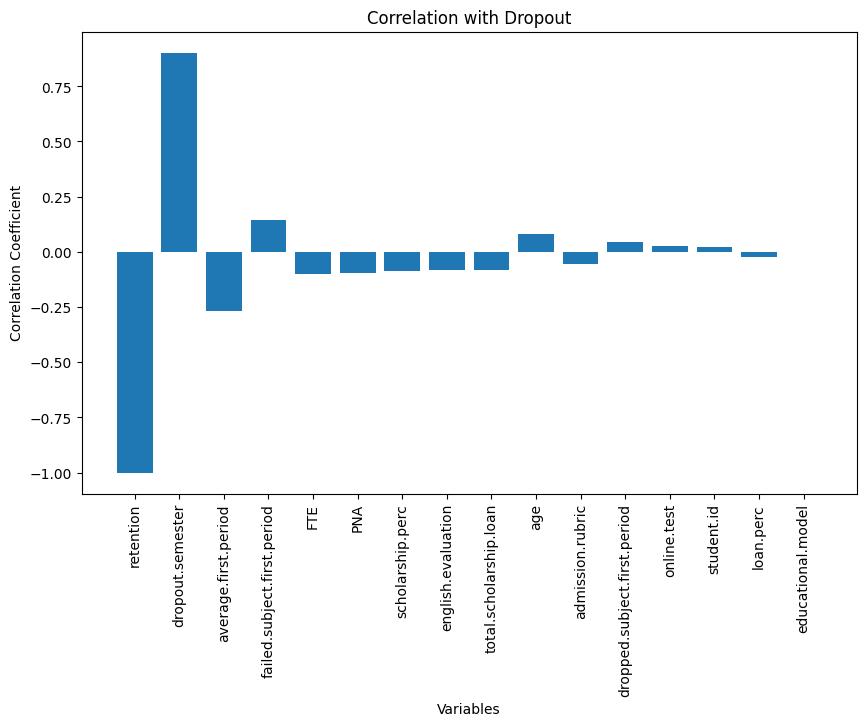

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


target_variable = 'Dropout'

correlations = {}
for column in df.columns:
    if column != target_variable and df[column].dtype != 'object':
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            mask = np.logical_and(np.isfinite(df[column]), np.isfinite(df[target_variable]))
            correlation, p_value = stats.pearsonr(df[column][mask], df[target_variable][mask])
            correlation_type = 'Pearson'
        else:
            df_temp = df[[column, target_variable]].dropna()
            correlation, p_value = stats.spearmanr(df_temp[column], df_temp[target_variable])
            correlation_type = 'Spearman'
        
        correlations[column] = (correlation, p_value, correlation_type)

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1][0]), reverse=True)

variable_names = [var[0] for var in sorted_correlations]
correlation_coeffs = [var[1][0] for var in sorted_correlations]


plt.figure(figsize=(10, 6))
plt.bar(variable_names, correlation_coeffs)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation with {target_variable}')
plt.xticks(rotation=90)
plt.show()


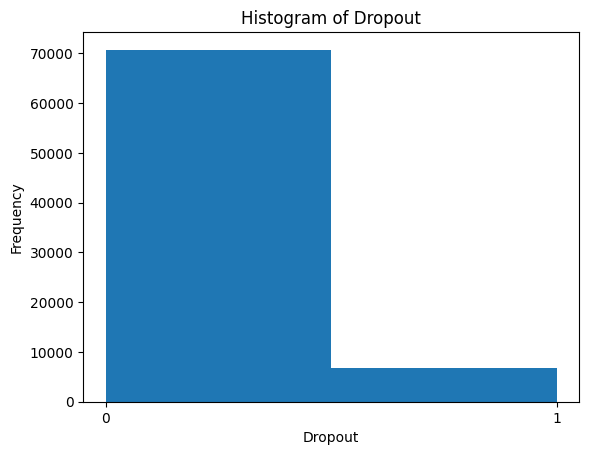

In [6]:

plt.hist(df["Dropout"], bins=2)
plt.xlabel('Dropout')
plt.ylabel('Frequency')
plt.title('Histogram of Dropout')
plt.xticks([0, 1])
plt.show()

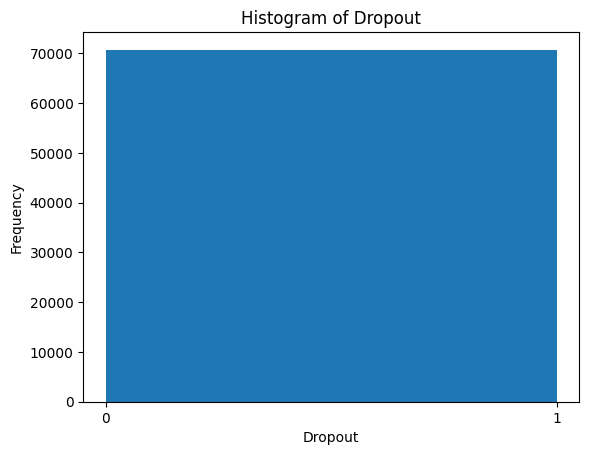

In [7]:
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['Dropout']), df['Dropout'])

df_balanced = pd.DataFrame(X_resampled, columns=df.drop(columns=['Dropout']).columns)
df_balanced['Dropout'] = y_resampled

df = df_balanced

plt.hist(df["Dropout"], bins=2)
plt.xlabel('Dropout')
plt.ylabel('Frequency')
plt.title('Histogram of Dropout')
plt.xticks([0, 1])
plt.show()


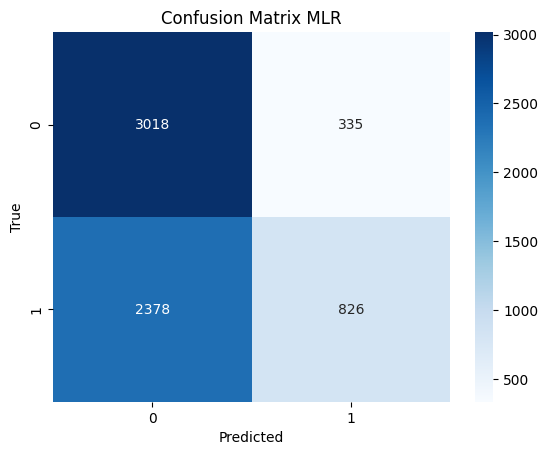

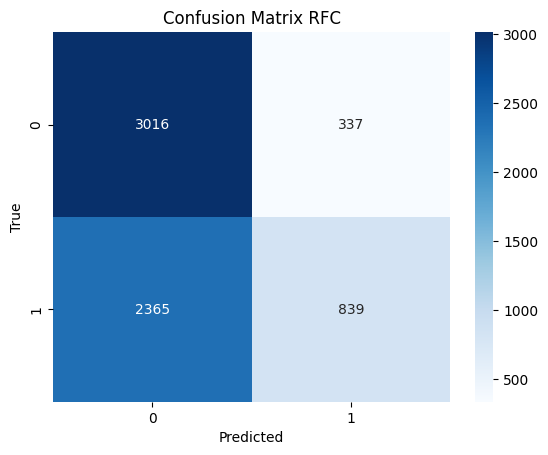

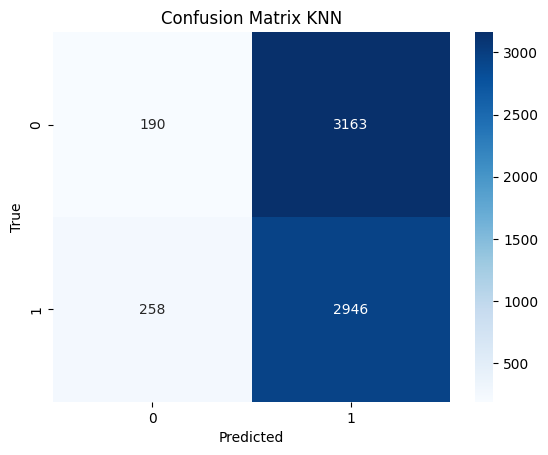

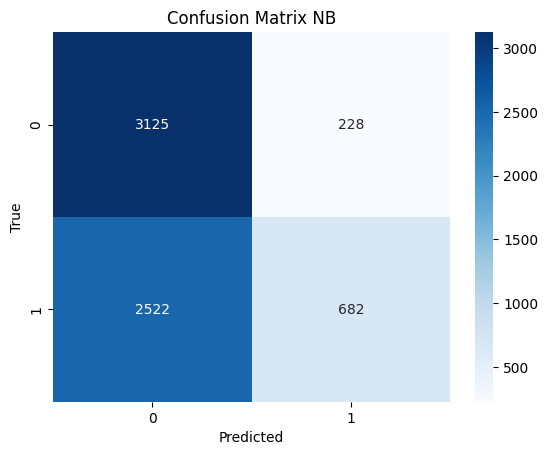

Epoch 1/20


2023-06-05 00:27:12.636682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


820/820 [==============================] - 10s 12ms/step - loss: 0.6928 - accuracy: 0.5119
Epoch 2/20
820/820 [==============================] - 9s 11ms/step - loss: 0.6925 - accuracy: 0.5145
Epoch 3/20
820/820 [==============================] - 9s 10ms/step - loss: 0.6928 - accuracy: 0.5142
Epoch 4/20
820/820 [==============================] - 12s 14ms/step - loss: 0.6928 - accuracy: 0.5149
Epoch 5/20
820/820 [==============================] - 9s 11ms/step - loss: 0.6928 - accuracy: 0.5149
Epoch 6/20
820/820 [==============================] - 10s 12ms/step - loss: 0.6928 - accuracy: 0.5149
Epoch 7/20
820/820 [==============================] - 8s 10ms/step - loss: 0.6928 - accuracy: 0.5142
Epoch 8/20
820/820 [==============================] - 8s 10ms/step - loss: 0.6933 - accuracy: 0.5145
Epoch 9/20
820/820 [==============================] - 10s 12ms/step - loss: 0.6927 - accuracy: 0.5149
Epoch 10/20
820/820 [==============================] - 9s 11ms/step - loss: 0.6927 - accuracy: 0.5

2023-06-05 00:30:11.164126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - 1s 3ms/step


/Users/pablo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


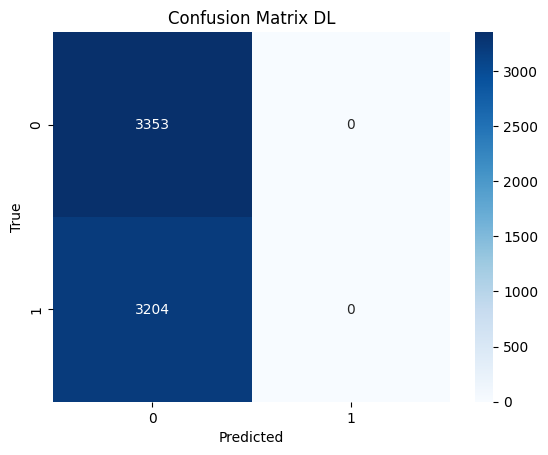

In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


results20 = {}


feature_names = ["failed.subject.first.period", "age", "online.test", "dropped.subject.first.period"]

df.dropna(inplace=True)

y = df['Dropout'].astype(bool)



df["dropped.subject.first.period"] = df["dropped.subject.first.period"].astype(int)
df["failed.subject.first.period"] = df["failed.subject.first.period"].astype(int)
df["online.test"] = df["online.test"].astype(int)
X = df[feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)
LRPred = np.round(LR.predict(X_test)).astype(bool)

LRAccuracy = accuracy_score(y_test, LRPred)
LRPrecision = precision_score(y_test, LRPred)
LRRecall = recall_score(y_test, LRPred)
LRF1 = f1_score(y_test, LRPred)
cm = confusion_matrix(y_test, LRPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix MLR")
plt.show()

results20["MLR"] = {
    'Accuracy': LRAccuracy,
    'Precision': LRPrecision,
    'Recall': LRRecall,
    'F1 Score': LRF1
}

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = np.round(model.predict(X_test)).astype(bool)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix RFC")
plt.show()

results20["RFC"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix KNN")
plt.show()

results20["KNN"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix NB")
plt.show()

results20["NB"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}



model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=True)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix DL")
plt.show()

results20["DL"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}





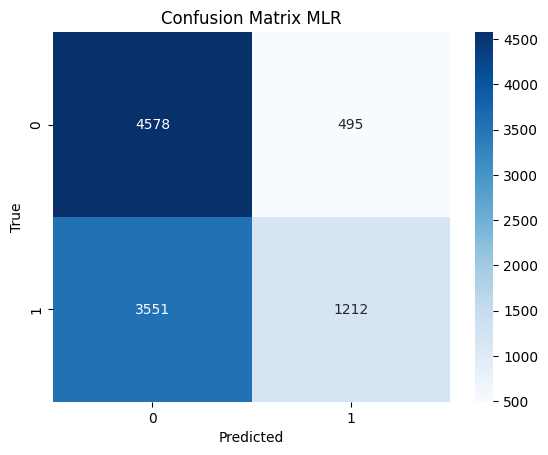

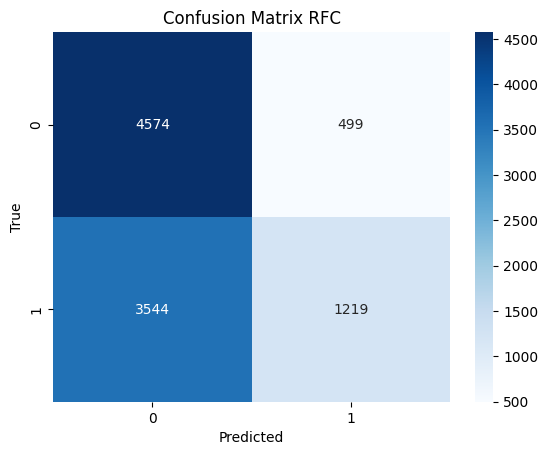

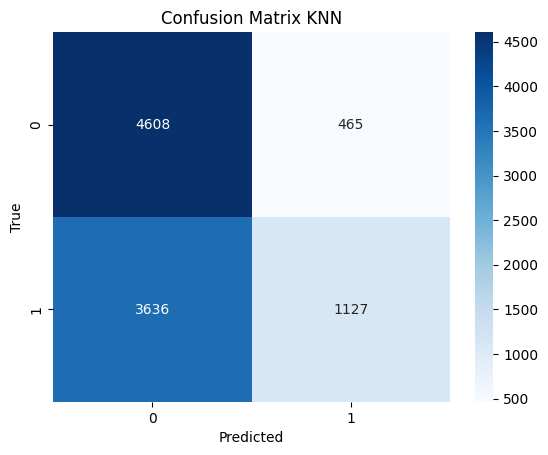

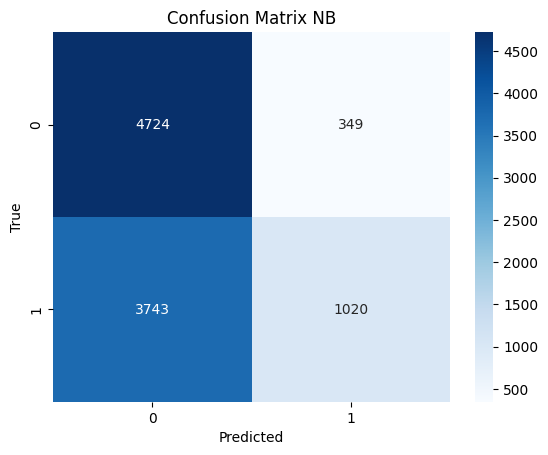

Epoch 1/20


2023-06-05 00:30:14.372279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 8s 11ms/step - loss: 0.6928 - accuracy: 0.5123
Epoch 2/20
718/718 [==============================] - 7s 10ms/step - loss: 0.6824 - accuracy: 0.5452
Epoch 3/20
718/718 [==============================] - 7s 10ms/step - loss: 0.6758 - accuracy: 0.5648
Epoch 4/20
718/718 [==============================] - 8s 11ms/step - loss: 0.6757 - accuracy: 0.5649
Epoch 5/20
718/718 [==============================] - 8s 11ms/step - loss: 0.6741 - accuracy: 0.5681
Epoch 6/20
718/718 [==============================] - 7s 10ms/step - loss: 0.6739 - accuracy: 0.5685
Epoch 7/20
718/718 [==============================] - 7s 10ms/step - loss: 0.6743 - accuracy: 0.5679
Epoch 8/20
718/718 [==============================] - 7s 10ms/step - loss: 0.6742 - accuracy: 0.5703
Epoch 9/20
718/718 [==============================] - 7s 10ms/step - loss: 0.6732 - accuracy: 0.5705
Epoch 10/20
718/718 [==============================] - 8s 11ms/step - loss: 0.6733 - accuracy: 0.5689


2023-06-05 00:32:43.761829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - 2s 6ms/step


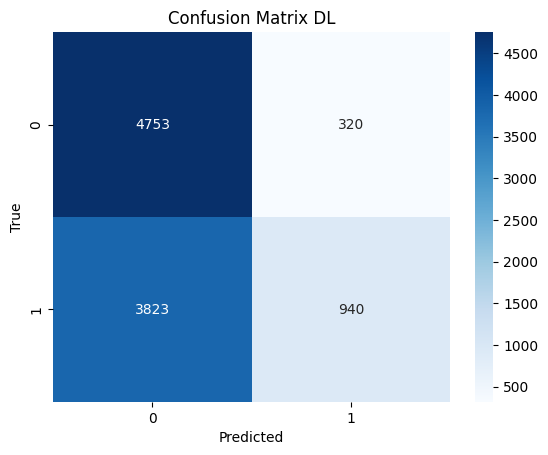

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


results30 = {}


feature_names = ["failed.subject.first.period", "age", "online.test", "dropped.subject.first.period"]

df.dropna(inplace=True)

y = df['Dropout'].astype(bool)



df["dropped.subject.first.period"] = df["dropped.subject.first.period"].astype(int)
df["failed.subject.first.period"] = df["failed.subject.first.period"].astype(int)
df["online.test"] = df["online.test"].astype(int)
X = df[feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)
LRPred = np.round(LR.predict(X_test)).astype(bool)

LRAccuracy = accuracy_score(y_test, LRPred)
LRPrecision = precision_score(y_test, LRPred)
LRRecall = recall_score(y_test, LRPred)
LRF1 = f1_score(y_test, LRPred)
cm = confusion_matrix(y_test, LRPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix MLR")
plt.show()

results30["MLR"] = {
    'Accuracy': LRAccuracy,
    'Precision': LRPrecision,
    'Recall': LRRecall,
    'F1 Score': LRF1
}

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = np.round(model.predict(X_test)).astype(bool)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix RFC")
plt.show()

results30["RFC"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix KNN")
plt.show()

results30["KNN"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix NB")
plt.show()

results30["NB"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}



model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=True)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix DL")
plt.show()

results30["DL"] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}





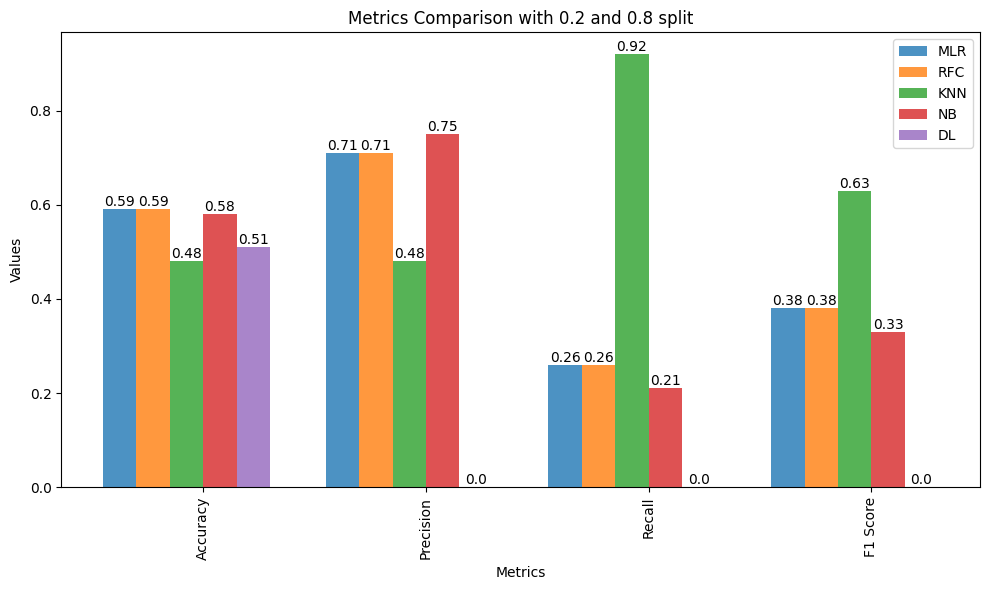

In [12]:
import matplotlib.pyplot as plt

titles = list(results20.keys())
metric_values = list(results20.values())

x = range(len(metric_values[0]))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

for i, title in enumerate(titles):
    metric_vals = list(metric_values[i].values())
    metric_vals= [round(val, 2) for val in metric_vals]

    ax.bar(x, metric_vals, width=bar_width, alpha=0.8, label=title)
    for j, val in enumerate(metric_vals):
        ax.text(x[j], val, str(val), ha='center', va='bottom')
    x = [val + bar_width for val in x]

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Metrics Comparison with 0.2 and 0.8 split')


ax.set_xticks([val + bar_width * len(titles) / 2 for val in range(len(metric_values[0]))])
ax.set_xticklabels(list(metric_values[0].keys()), rotation='vertical')
ax.legend()
plt.tight_layout()
plt.show()


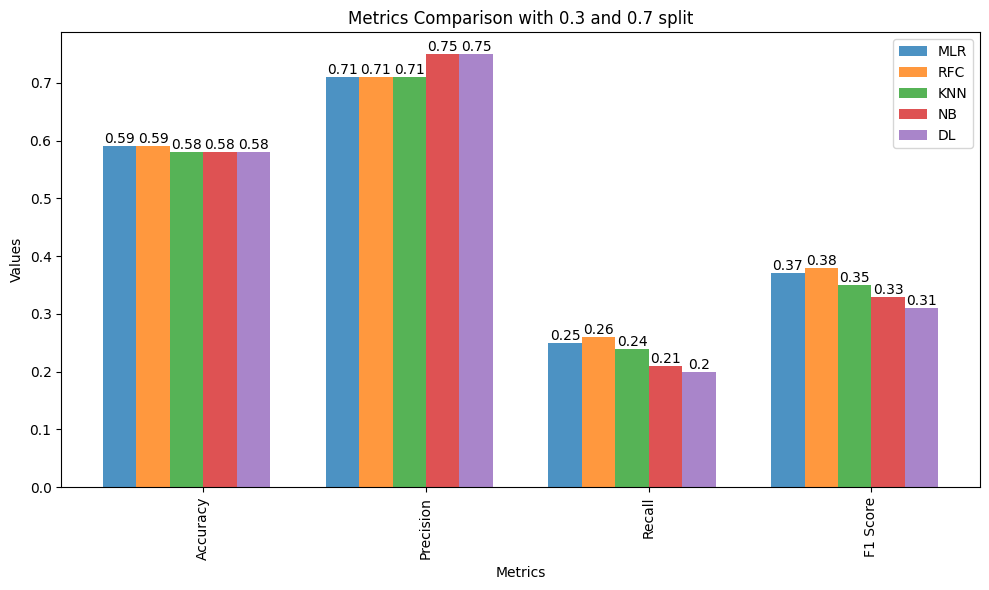

In [13]:
import matplotlib.pyplot as plt

titles = list(results30.keys())
metric_values = list(results30.values())

x = range(len(metric_values[0]))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

for i, title in enumerate(titles):
    metric_vals = list(metric_values[i].values())
    metric_vals= [round(val, 2) for val in metric_vals]

    ax.bar(x, metric_vals, width=bar_width, alpha=0.8, label=title)
    for j, val in enumerate(metric_vals):
        ax.text(x[j], val, str(val), ha='center', va='bottom')
    x = [val + bar_width for val in x]

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Metrics Comparison with 0.3 and 0.7 split')


ax.set_xticks([val + bar_width * len(titles) / 2 for val in range(len(metric_values[0]))])
ax.set_xticklabels(list(metric_values[0].keys()), rotation='vertical')
ax.legend()
plt.tight_layout()
plt.show()


In [14]:
df['Prediction'] = LR.predict(df[feature_names])

In [16]:
sampleOf30k = df.sample(n=30000)

In [27]:
totalProfit = 0

for index, row in df.iterrows():
    pred = row['Prediction']
    if(pred > 0.5):
        totalProfit -= 1/6
        totalProfit += 6 * 0.8
        if(row['Dropout'] == 0):
            totalProfit -= 6

print("Profit tuitions:", totalProfit)

Profit tuitions: 16102.06666666647
